<a href="https://colab.research.google.com/github/Laexey/DataScianceLearn/blob/master/TimeSeries/%D0%92%D1%80_%D1%80%D1%8F%D0%B4%D1%8B_%D0%94%D0%97_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from datetime import datetime
%matplotlib inline
plt.rcParams['figure.figsize'] = (18,4)

In [0]:
!ls 'drive/My Drive/Projects/TimeSeries'

daily-total-female-births-in-cal.csv  monthly-boston-armed-robberies-j.csv
international-airline-passengers.csv  monthly-sales-of-company-x-jan-6.csv
mean-monthly-air-temperature-deg.csv  weekly-closings-of-the-dowjones-.csv


**Для изучения взят график продаж по месяцам компании X**

In [0]:
time_stamp = pd.read_csv('drive/My Drive/Projects/TimeSeries/monthly-sales-of-company-x-jan-6.csv', index_col='Month', parse_dates=True, dayfirst=True)

In [0]:
time_stamp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 77 entries, 1965-01-01 to 1971-05-01
Data columns (total 1 columns):
Count    77 non-null int64
dtypes: int64(1)
memory usage: 1.2 KB


In [0]:
time_stamp.tail()

,Count
Month,
1971-01-01,628
1971-02-01,308
1971-03-01,324
1971-04-01,248
1971-05-01,272


In [0]:
ts = time_stamp.copy()#time_stamp['Count']

**На графике видна мультипликативная сезонность, а так же тренд. Таким образом, ряд не стационарный.**

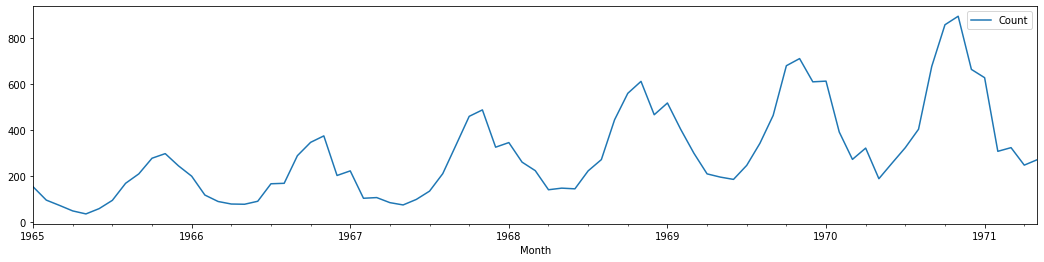

In [0]:
ts.plot()

In [0]:
ts.Count.autocorr()

0.8745190140938308

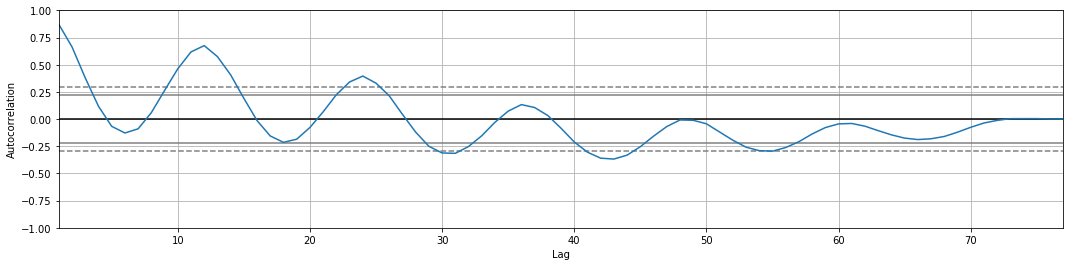

In [0]:

pd.plotting.autocorrelation_plot(ts)

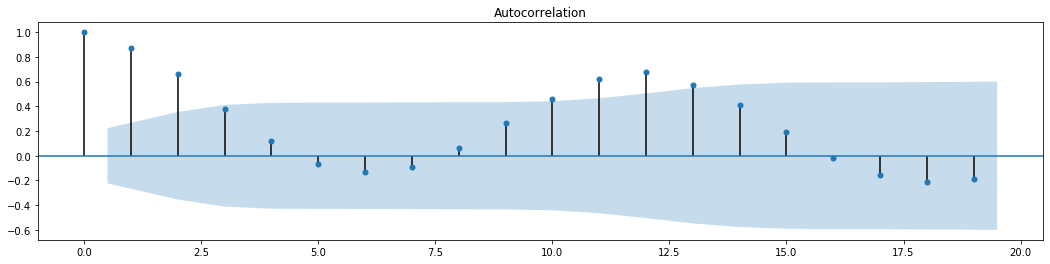

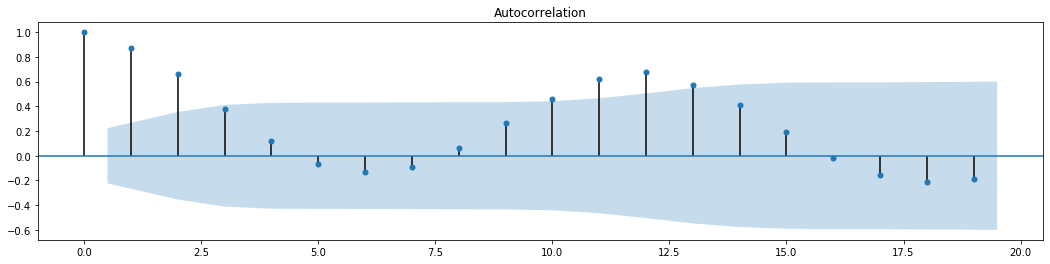

In [0]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(ts.Count.dropna())

**Для того, чтобы убрать мультипликативную составляющюю, воспользуемся методом Бокса Кокса.**



In [0]:
tsbc = boxcox(ts['Count'])

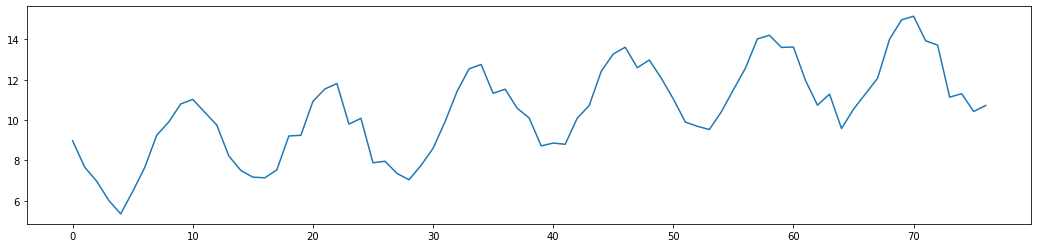

In [0]:
plt.plot(tsbc[0])

**Тест Дики-Фуллера показывает высокое значение p-value, что подтверждает факт о нестационарности ряда (визуально это так же очевидно)**

In [0]:
adfuller(tsbc[0])[1]

0.863756586766914

**Возьмем разность исходного массива для n=1**

In [0]:
import numpy as np

In [0]:
ts2=np.diff(tsbc[0], n=1)

**Тест показал, что результат оказался приемлемым**

In [0]:
adfuller(ts2)[1]

0.015599469714685253

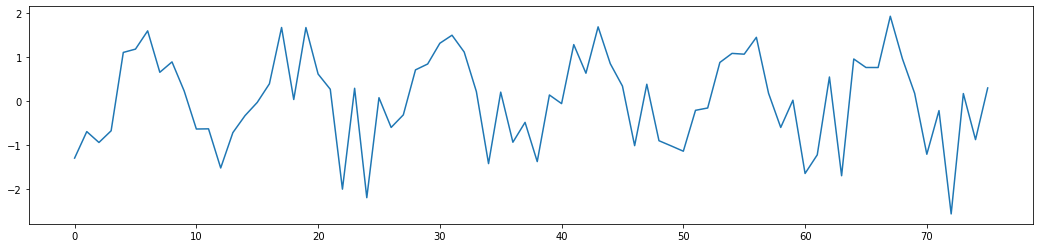

In [0]:

plt.plot(ts2)

**Однако, кореллограмма показывает не убедительный результат, который мало отличается от исходного варианта последовательности.**

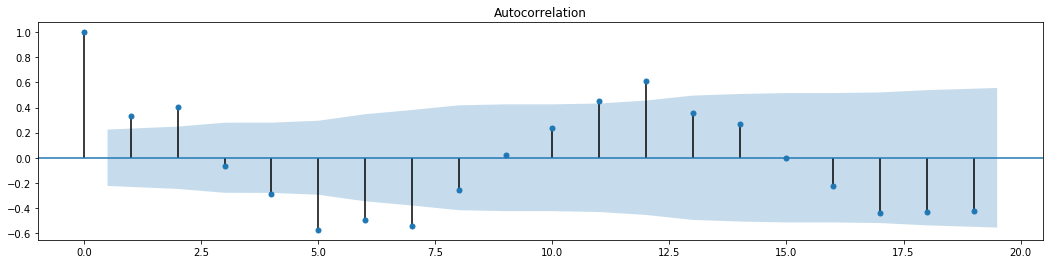

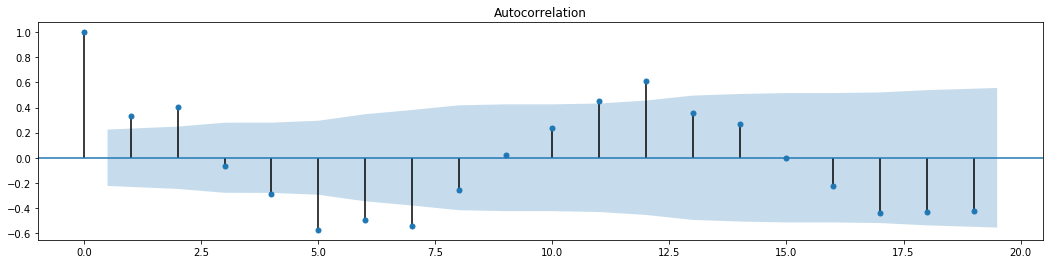

In [0]:
plot_acf(ts2)

**Берем еще одну разность. Теперь график выглядит более хаотичным. Ниже проведена проверка методом Дики-Фуллера, а так же построена кореллограмма, чтобы убедиться в стационарности ряда**

In [0]:
ts3=np.diff(ts2, n=1)

In [0]:
adfuller(ts3)[1]

4.978931024877979e-11

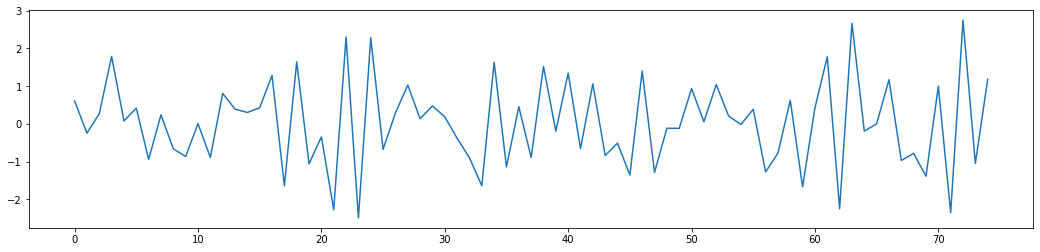

In [0]:
plt.plot(ts3)

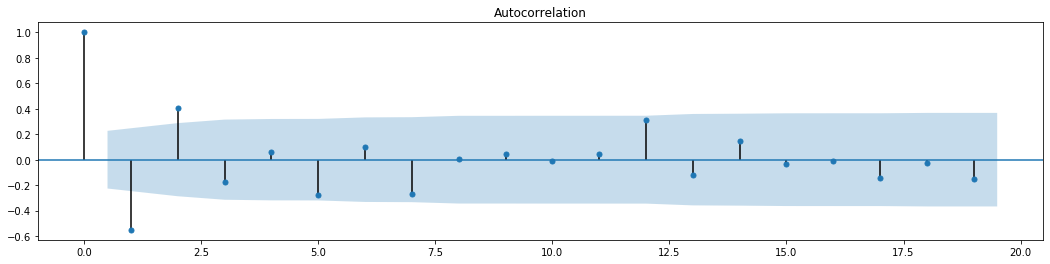

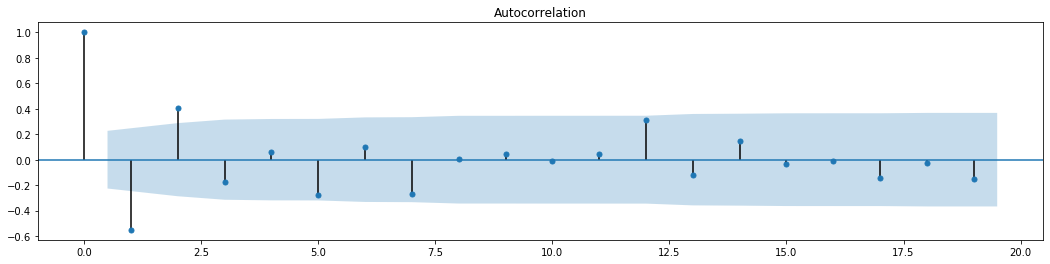

In [0]:
plot_acf(ts3)

**Визуально так же можно сделать вывод от хаотичности ряда, что позволяет дальше строить модель для предсказания**